In [1]:
import keras
#from PIL import Image
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
#from PIL import Image
from keras.utils import to_categorical
import random

In [2]:
image1 = [None] * 1573
label1 = [None] * 1573
image2 = [None] * 1573
label2 = [None] * 1573
#创建数据集列表
data_amount = 0

n = 0

#insulting
for i in range(1,1571):
    #
    data_place_one = './data_training_20240214/insulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image1[i-1] = np.array(img_2)
        label1[i-1] = 1
    else:
        pass
        #print("Failed to load image. or not exist")

#uninsulting
for i in range(1,1571):
    data_place_one = './data_training_20240214/uninsulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image2[i-1] = np.array(img_2)
        label2[i-1] = 0
    else:
        pass
        #print("Failed to load image. or not exist")
#print(img)

label = label1+label2
image = image1+image2

#删除空值
label = [x for x in label if x != None]
image = [x for x in image if np.any(x)]


combined_list = list(zip(label, image))
# 打乱元组列表
random.shuffle(combined_list)
# 恢复两个列表
label, image = zip(*combined_list)

val_image = image[1000:1200]
val_label = label[1000:1200]
image = image[:1000]
label = label[:1000]
test_image = image[1200:]
test_label = label[1200:]


In [3]:
label = np.array(label)
image = np.array(image)
val_label = np.array(val_label)
val_image = np.array(val_image)
test_label = np.array(test_label)
test_image = np.array(test_image)
#print(train_label.shape)

In [4]:
# 将标签数据进行one-hot编码
label_encoded = to_categorical(label, num_classes=2)
test_label_encoded = to_categorical(test_label, num_classes=2)
val_label_encoded = to_categorical(val_label, num_classes=2)

In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)), 
    layers.Dense(2048,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(2,activation="sigmoid")
])
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [6]:
epochs_ = 50
history = model.fit(image,
        label_encoded,
        epochs=epochs_,
        batch_size=100,
        validation_data=(val_image,val_label_encoded)
        )

Epoch 1/50
10/10 [==============================] - 6s 513ms/step - loss: 17145.1602 - accuracy: 0.5090 - val_loss: 8345.4971 - val_accuracy: 0.4900
Epoch 2/50
10/10 [==============================] - 5s 461ms/step - loss: 6984.6416 - accuracy: 0.5330 - val_loss: 3772.2542 - val_accuracy: 0.5100
Epoch 3/50
10/10 [==============================] - 5s 457ms/step - loss: 4057.9016 - accuracy: 0.4870 - val_loss: 2011.6250 - val_accuracy: 0.5100
Epoch 4/50
10/10 [==============================] - 5s 473ms/step - loss: 1367.2657 - accuracy: 0.5170 - val_loss: 931.7672 - val_accuracy: 0.5100
Epoch 5/50
10/10 [==============================] - 5s 470ms/step - loss: 2010.2896 - accuracy: 0.5050 - val_loss: 2011.0725 - val_accuracy: 0.5100
Epoch 6/50
10/10 [==============================] - 5s 465ms/step - loss: 2090.7688 - accuracy: 0.4730 - val_loss: 992.0542 - val_accuracy: 0.4900
Epoch 7/50
10/10 [==============================] - 5s 473ms/step - loss: 1038.9413 - accuracy: 0.4990 - val_loss

In [7]:
model.evaluate(test_image,test_label_encoded)
y = np.argmax(model.predict(test_image[:]),axis=1)
print('原始：',y[:20])
print('结果：',test_label[:20])

C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\generic_utils.py:238: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


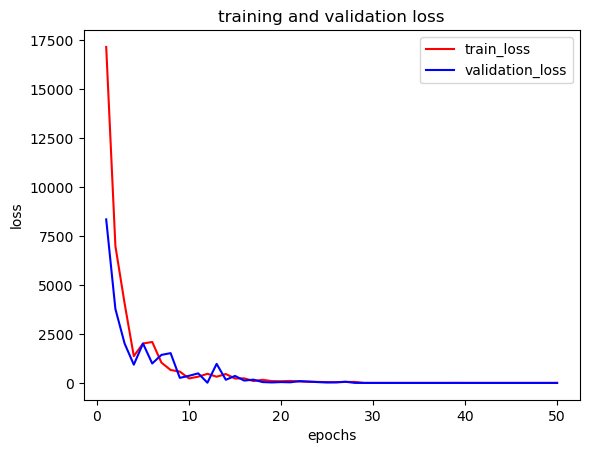

In [8]:
history_dir = history.history
print(history_dir.keys())
loss_values = history_dir["loss"]
accuracy_values = history_dir["accuracy"]
val_loss_values = history_dir["val_loss"]
val_accuracy_values = history_dir["val_accuracy"]
x_epochs = range(1,epochs_+1)
plt.plot(x_epochs,loss_values,"r",label = "train_loss")
plt.plot(x_epochs,val_loss_values,"b",label = "validation_loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

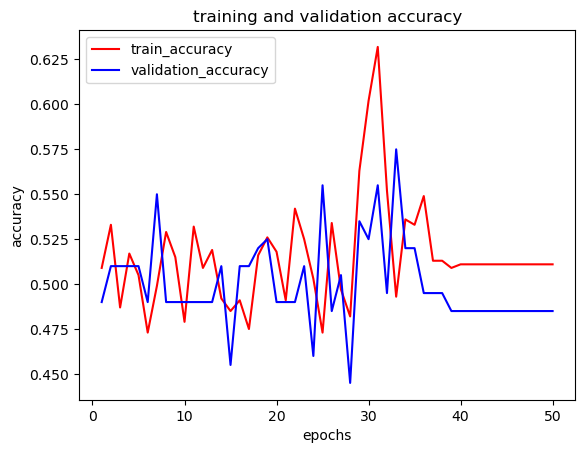

In [9]:
plt.plot(x_epochs,accuracy_values,"r",label = "train_accuracy")
plt.plot(x_epochs,val_accuracy_values,"b",label = "validation_accuracy")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()